In [13]:
import pandas as pd
import matplotlib.pyplot as plt 

In [14]:
df = pd.DataFrame([0.4, 0.6, 0.3, 0.2, 0.4, 0.5, 0.2, 0.1, 0.4, 0.4, 0, 0.2, -0.2, -2.8, 0.9],
            index=['2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3'],
            columns=['Percentage change on previous period'])
df

,Percentage change on previous period
2017-Q1,0.4
2017-Q2,0.6
2017-Q3,0.3
2017-Q4,0.2
2018-Q1,0.4
2018-Q2,0.5
2018-Q3,0.2
2018-Q4,0.1
2019-Q1,0.4
2019-Q2,0.4


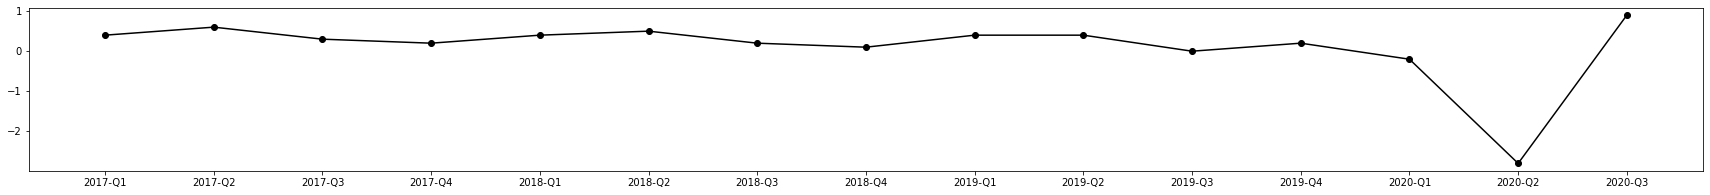

In [15]:
 _, ax = plt.subplots(1, 1, figsize=(30, 3))
ax.plot(df['Percentage change on previous period'], color='black', marker='o', label='original')
plt.show()

In [16]:
df = df.reset_index(drop=False)
df

,index,Percentage change on previous period
0,2017-Q1,0.4
1,2017-Q2,0.6
2,2017-Q3,0.3
3,2017-Q4,0.2
4,2018-Q1,0.4
5,2018-Q2,0.5
6,2018-Q3,0.2
7,2018-Q4,0.1
8,2019-Q1,0.4
9,2019-Q2,0.4


In [20]:
index = df['index'].str[-1].astype(int)

In [21]:
for i in range(1, 5):
    df[f'is_q{i}'] = (index == i).astype(int)

In [22]:
df

,index,Percentage change on previous period,is_q1,is_q2,is_q3,is_q4
0,2017-Q1,0.4,1,0,0,0
1,2017-Q2,0.6,0,1,0,0
2,2017-Q3,0.3,0,0,1,0
3,2017-Q4,0.2,0,0,0,1
4,2018-Q1,0.4,1,0,0,0
5,2018-Q2,0.5,0,1,0,0
6,2018-Q3,0.2,0,0,1,0
7,2018-Q4,0.1,0,0,0,1
8,2019-Q1,0.4,1,0,0,0
9,2019-Q2,0.4,0,1,0,0
